### test LadderS21()

-------------------------------------------------
        C1       C2       C3       C4       C5   
     -------- -------- -------- -------- --------
L  | 4.09e-08 2.44e-10 6.83e-08 2.44e-10 4.09e-08
C  | 1.08e-13  1.8e-11 6.44e-14  1.8e-11 1.08e-13

filter_type = chebyshev
order = nan
freq_center = 2400000000.0
frac_BW = 0.1
comp_var = nan
-------------------------------------------------

tensor([1.0759e-13, 4.0874e-08, 1.8026e-11, 2.4396e-10, 6.4386e-14, 6.8301e-08,
        1.8026e-11, 2.4396e-10, 1.0759e-13, 4.0874e-08])


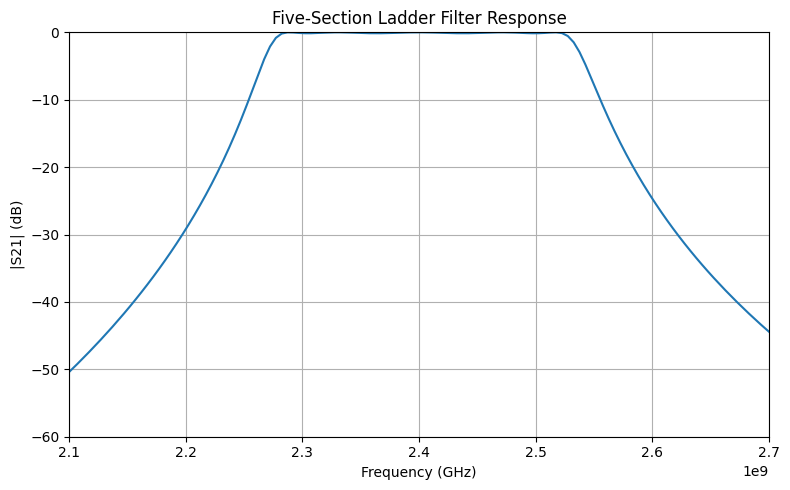

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import torch


import importlib
import sys
sys.path.append('../Functions/')
import electrical as EE
importlib.reload(EE)
import electrical_sim as EE_sim
importlib.reload(EE_sim)



myBP_2 = EE.generate_BP( filter_style="chebyshev", order=5, ripple_dB=15, freq_center=2.4e9, frac_BW=0.1, comp_var=np.nan )
print(myBP_2)



net = EE_sim.LadderS21().to("cpu")   # use "cpu" for CPU


# random LC values (batch of 32)
# p = torch.rand(1, 10, device="cpu") * 1e-9  # farads / henrys demo scale
p = myBP_2.elements_2_tensor()
print(p)


s21_dB = net(p)                                  # shape (32, 1000)

s21_db = s21_dB.numpy()


# Plot
freq = np.linspace(0, 5e9, 1000)
plt.figure(figsize=(8, 5))
plt.plot(freq, s21_db)
plt.xlim(2.1e9, 2.7e9)
plt.ylim(-60, 0)
plt.xlabel("Frequency (GHz)")
plt.ylabel("|S21| (dB)")
plt.title("Five-Section Ladder Filter Response")
plt.grid(True)
plt.tight_layout()

